# Homework 2

## Logistic Regression Implementation

![](./logistic_regression_schematic.png)

We will try to uptimise Logistic Regression by minimising the following loss function wrt $\mathbf{w}=[w_0, \dots, w_D]$ 
$$  \mathcal{L}(\mathbf{w}) = - \frac{1}{N} \sum_{i=1}^{N}\big( y_i \log \sigma(\mathbf{w}^T\mathbf{x}_i) + (1- y_i) \log (1- \sigma(\mathbf{w}^T\mathbf{x}_i)\big) $$

The dataset you will use is voting records in the US House of Representatives in 1984. The goal is to predict whether the representative is a Republican or Democrat. The original dataset is available here:

http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

For the purpose of this practical, we have put the data in numpy array format, as well as deleted those records that had missing entries. This dataset is available on the slack and can be loaded as follows:

In [17]:
import pickle as cp
import numpy as np
import matplotlib.pyplot as plt

X, y = cp.load(open('voting.pickle', 'rb'))
N, D = X.shape

print(N, D)

232 16


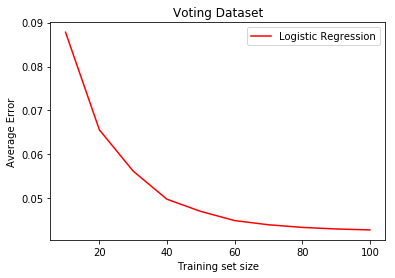

In [19]:
from sklearn import linear_model

lamda = 0.1
C_reg = 1 / (2 * lamda)
logreg = linear_model.LogisticRegression(C = C_reg, fit_intercept = True)
sum_logreg_error = np.zeros(10)

num_iterations = 1000

for iter in range(num_iterations):
    
    N_train = int(0.8 * N)
    shuffler = np.random.permutation(N)

    X_train = X[shuffler[:N_train]]
    y_train = y[shuffler[:N_train]]
    
    X_test = X[shuffler[N_train:]]
    y_test = y[shuffler[N_train:]]

    for i in range(10):
        
        size = int((i + 1) * N_train / 10)
        logreg.fit(X_train[:size], y_train[:size])
        
        y_logreg = logreg.predict(X_test)
        
        sum_logreg_error[i] += np.sum(y_logreg != y_test)
    
plt.xlabel('Training set size')    
plt.ylabel('Average Error')
plt.title('Voting Dataset')

plt.plot(range(10, 110, 10), sum_logreg_error / (num_iterations * (N-N_train)), 'r', label='Logistic Regression')

plt.legend()
plt.show()

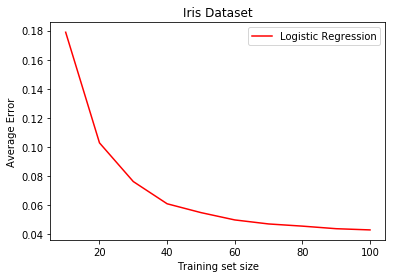

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris['data'], iris['target']
N, D = X.shape
    
lamda = 0.1
C_reg = 1 / (2 * lamda)
logreg = linear_model.LogisticRegression(C = C_reg, fit_intercept = True)

sum_logreg_error = np.zeros(10)

num_iterations = 1000

for iter in range(0, num_iterations):

    Ntrain = int(0.8 * N)
    shuffler = np.random.permutation(N)
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]

    for i in range(0, 10):
        size = int((i+1) * Ntrain / 10)
        
        logreg.fit(Xtrain[:size], ytrain[:size])
        y_logreg = logreg.predict(Xtest)
        sum_logreg_error[i] += np.sum(y_logreg != ytest)

plt.xlabel('Training set size')    
plt.ylabel('Average Error')
plt.title('Iris Dataset')

plt.plot(range(10, 110, 10), sum_logreg_error / (num_iterations * (N - Ntrain)), 'r', label='Logistic Regression')

plt.legend()
plt.show()